Select an ROI for Banana and press ENTER or SPACE to confirm. Press C to cancel.


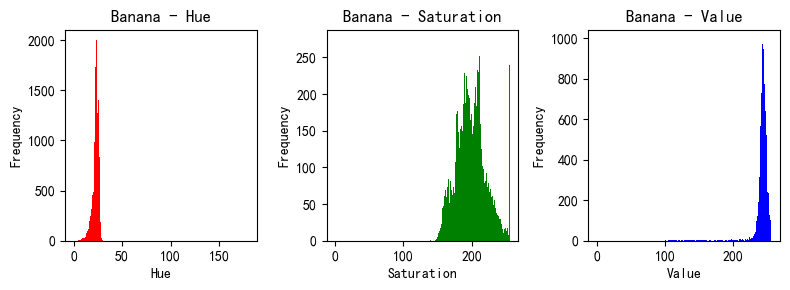

Select an ROI for Apple and press ENTER or SPACE to confirm. Press C to cancel.


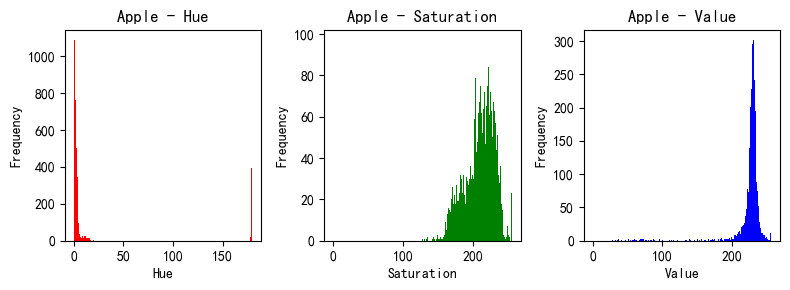

Select an ROI for Pineapple and press ENTER or SPACE to confirm. Press C to cancel.


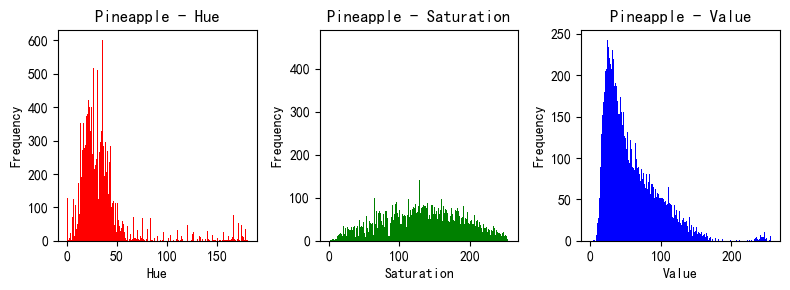

Select an ROI for Kiwi and press ENTER or SPACE to confirm. Press C to cancel.


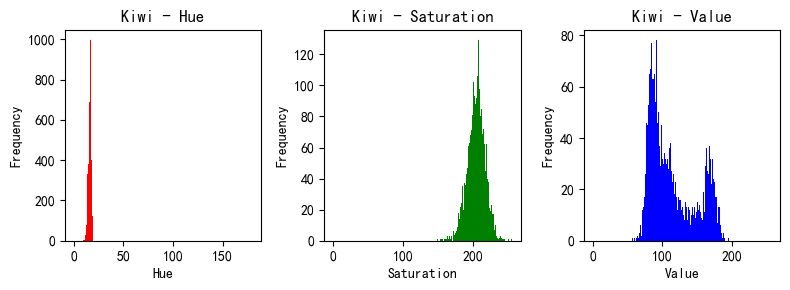

Select an ROI for Strawberry and press ENTER or SPACE to confirm. Press C to cancel.


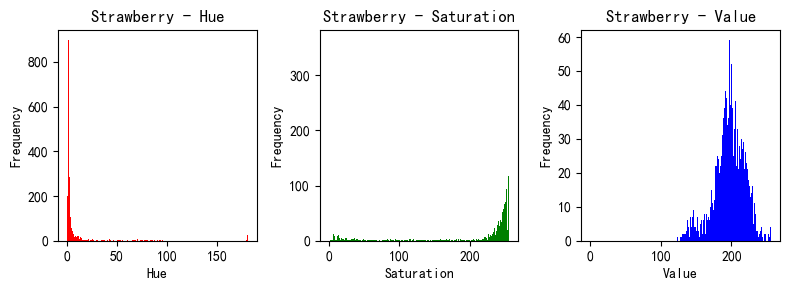

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to manually extract ROI and calculate HSV histogram
def extract_roi_and_plot_histogram(img_rgb, img_hsv, title):
    """
    Allow the user to select a rectangular ROI for a specific fruit.
    Plot the HSV histogram of the selected ROI.
    """
    # Convert the image back to BGR for OpenCV window
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    # Let the user select an ROI (rectangle) from the image
    print(f"Select an ROI for {title} and press ENTER or SPACE to confirm. Press C to cancel.")
    roi = cv2.selectROI("Select ROI", img_bgr, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()

    # Crop the selected ROI from the HSV image
    x, y, w, h = map(int, roi)
    roi_hsv = img_hsv[y:y+h, x:x+w]

    # Split the HSV channels
    h, s, v = cv2.split(roi_hsv)

    # Plot the histograms for H, S, and V channels
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 3, 1)
    plt.hist(h.ravel(), bins=180, range=(0, 180), color='r')
    plt.title(f"{title} - Hue")
    plt.xlabel("Hue")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 2)
    plt.hist(s.ravel(), bins=256, range=(0, 256), color='g')
    plt.title(f"{title} - Saturation")
    plt.xlabel("Saturation")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 3)
    plt.hist(v.ravel(), bins=256, range=(0, 256), color='b')
    plt.title(f"{title} - Value")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.show()

# Main function to load the image and process HSV histograms
def main():
    # Load the image
    image_path = "image.png"  # Replace with your image file path
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print("Error: Image not found!")
        return
    
    # Convert to RGB and HSV color spaces
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    # Call the function for different fruits
    extract_roi_and_plot_histogram(img_rgb, img_hsv, title="Banana")
    extract_roi_and_plot_histogram(img_rgb, img_hsv, title="Apple")
    extract_roi_and_plot_histogram(img_rgb, img_hsv, title="Pineapple")
    extract_roi_and_plot_histogram(img_rgb, img_hsv, title="Kiwi")
    extract_roi_and_plot_histogram(img_rgb, img_hsv, title="Strawberry")

if __name__ == "__main__":
    main()


In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Function to manually extract ROI and calculate HSV histogram
def extract_roi_and_save_histogram(img_rgb, img_hsv, title, output_dir):
    """
    Allow the user to select a rectangular ROI for a specific fruit.
    Save the HSV histogram of the selected ROI.
    """
    # Convert the image back to BGR for OpenCV window
    img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)

    # Let the user select an ROI (rectangle) from the image
    print(f"Select an ROI for {title} and press ENTER or SPACE to confirm. Press C to cancel.")
    roi = cv2.selectROI("Select ROI", img_bgr, fromCenter=False, showCrosshair=True)
    cv2.destroyAllWindows()

    # Crop the selected ROI from the HSV image
    x, y, w, h = map(int, roi)
    roi_hsv = img_hsv[y:y+h, x:x+w]

    # Split the HSV channels
    h, s, v = cv2.split(roi_hsv)

    # Plot the histograms for H, S, and V channels
    plt.figure(figsize=(8, 3))
    plt.subplot(1, 3, 1)
    plt.hist(h.ravel(), bins=180, range=(0, 180), color='r')
    plt.title(f"{title} - Hue")
    plt.xlabel("Hue")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 2)
    plt.hist(s.ravel(), bins=256, range=(0, 256), color='g')
    plt.title(f"{title} - Saturation")
    plt.xlabel("Saturation")
    plt.ylabel("Frequency")

    plt.subplot(1, 3, 3)
    plt.hist(v.ravel(), bins=256, range=(0, 256), color='b')
    plt.title(f"{title} - Value")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()

    # Save the histogram plot as a file
    os.makedirs(output_dir, exist_ok=True)  # Create output directory if it doesn't exist
    output_path = os.path.join(output_dir, f"{title}_histogram.png")
    plt.savefig(output_path)  # Save the plot
    print(f"Saved histogram for {title} at: {output_path}")

    plt.show()

# Main function to load the image and process HSV histograms
def main():
    # Load the image
    image_path = "image.png"  # Replace with your image file path
    output_dir = "histograms"  # Directory to save histograms
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print("Error: Image not found!")
        return
    
    # Convert to RGB and HSV color spaces
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    # Call the function for different fruits
    extract_roi_and_save_histogram(img_rgb, img_hsv, title="Banana", output_dir=output_dir)
    extract_roi_and_save_histogram(img_rgb, img_hsv, title="Apple", output_dir=output_dir)
    extract_roi_and_save_histogram(img_rgb, img_hsv, title="Pineapple", output_dir=output_dir)
    extract_roi_and_save_histogram(img_rgb, img_hsv, title="Kiwi", output_dir=output_dir)
    extract_roi_and_save_histogram(img_rgb, img_hsv, title="Strawberry", output_dir=output_dir)

if __name__ == "__main__":
    main()


Select an ROI for Banana and press ENTER or SPACE to confirm. Press C to cancel.


ValueError: not enough values to unpack (expected 3, got 0)

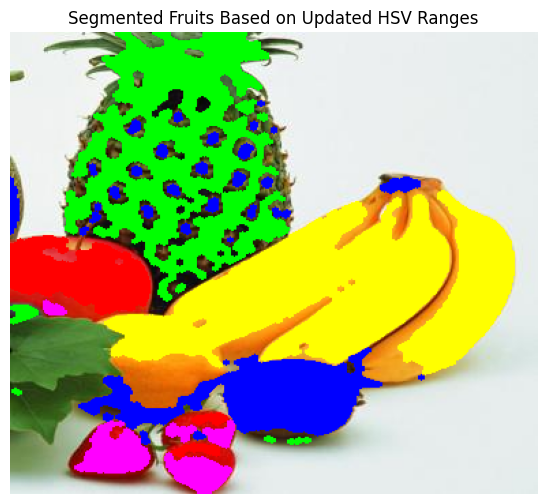

Fruit Counts: {'banana': 2, 'apple': 1, 'pineapple': 1, 'kiwi': 1, 'strawberry': 2}


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define HSV ranges based on histograms
hsv_fruit_ranges = {
    "banana": (np.array([20, 70, 200]), np.array([30, 255, 255])),  # Example from banana histogram
    "apple": (np.array([0, 76, 220]), np.array([10, 255, 255])),    # Example from apple histogram
    "pineapple": (np.array([0, 0, 19]), np.array([110, 147, 92])),  # Example from pineapple histogram
    "kiwi": (np.array([10, 150, 80]), np.array([25, 255, 200])),     # Example from kiwi histogram
    "strawberry": (np.array([0, 200, 150]), np.array([10, 255, 200]))  # Example from strawberry histogram
}

# Function to apply HSV-based segmentation and count fruits
def segment_and_count_fruits(img_hsv, img_rgb, hsv_ranges):
    segmented_img = img_rgb.copy()  # For visualization
    fruit_counts = {}  # Store the count of each fruit

    # Define visualization colors for each fruit
    visualization_colors = {
        "banana": (255, 255, 0),
        "apple": (255, 0, 0),
        "pineapple": (0, 255, 0),
        "kiwi": (0, 0, 255),
        "strawberry": (255, 0, 255)
    }

    for fruit, (lower, upper) in hsv_ranges.items():
        # Create a mask based on the HSV range
        mask = cv2.inRange(img_hsv, lower, upper)

        # Morphological operations to clean up the mask
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_OPEN, kernel)

        # Count connected components
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask_cleaned, connectivity=8)
        fruit_counts[fruit] = sum(1 for i in range(1, num_labels) if stats[i, cv2.CC_STAT_AREA] > 500)

        # Apply the mask to the visualization image
        segmented_img[mask_cleaned > 0] = visualization_colors[fruit]

    return segmented_img, fruit_counts

# Main function to load image, segment fruits, and display results
def main():
    # Load the image
    image_path = "image.png"  # Replace with your image file path
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print("Error: Image not found!")
        return
    
    # Convert to RGB and HSV color spaces
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    # Segment fruits and count them
    segmented_img, fruit_counts = segment_and_count_fruits(img_hsv, img_rgb, hsv_fruit_ranges)

    # Display the segmented image
    plt.figure(figsize=(10, 6))
    plt.imshow(segmented_img)
    plt.title("Segmented Fruits Based on Updated HSV Ranges")
    plt.axis('off')
    plt.show()

    # Display fruit counts
    print("Fruit Counts:", fruit_counts)

if __name__ == "__main__":
    main()


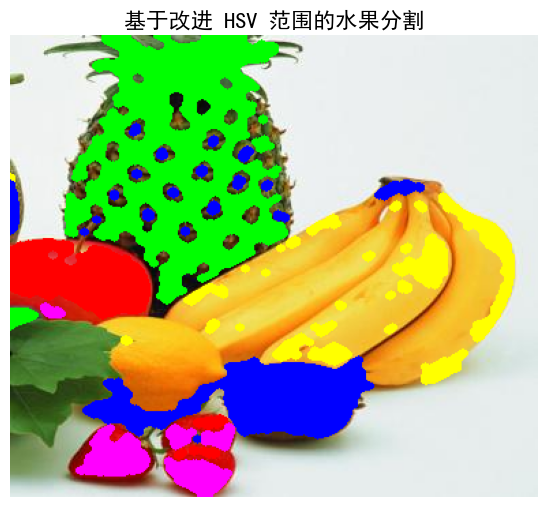

水果统计数量： {'banana': 3, 'apple': 1, 'pineapple': 1, 'kiwi': 1, 'strawberry': 2}


In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']
rcParams['axes.unicode_minus'] = False

# 定义 HSV 范围（可调整）
hsv_fruit_ranges = {
    "banana": (np.array([20, 70, 160]), np.array([30, 255, 240])),  # Example from banana histogram
    "apple": (np.array([0, 76, 220]), np.array([10, 255, 255])),    # Example from apple histogram
    "pineapple": (np.array([0, 0, 19]), np.array([110, 147, 92])),  # Example from pineapple histogram
    "kiwi": (np.array([10, 150, 80]), np.array([25, 255, 200])),     # Example from kiwi histogram
    "strawberry": (np.array([0, 200, 150]), np.array([10, 255, 200]))  # Example from strawberry histogram
}

# 根据 HSV 范围进行分割并统计水果数量
def segment_and_count_fruits(img_hsv, img_rgb, hsv_ranges):
    segmented_img = img_rgb.copy()
    fruit_counts = {}
    visualization_colors = {
        "banana": (255, 255, 0),
        "apple": (255, 0, 0),
        "pineapple": (0, 255, 0),
        "kiwi": (0, 0, 255),
        "strawberry": (255, 0, 255)
    }

    for fruit, (lower, upper) in hsv_ranges.items():
        # 创建掩膜
        mask = cv2.inRange(img_hsv, lower, upper)

        # 形态学操作：调整核大小
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
        mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
        mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_OPEN, kernel)

        # 统计连通区域
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask_cleaned, connectivity=4)
        fruit_counts[fruit] = sum(1 for i in range(1, num_labels) if stats[i, cv2.CC_STAT_AREA] >400)

        # 应用掩膜
        segmented_img[mask_cleaned > 0] = visualization_colors[fruit]

    return segmented_img, fruit_counts

# 主函数：加载图像、分割水果并显示结果
def main():
    # 加载图像
    image_path = "image.png"  # 替换为你的图像路径
    img_bgr = cv2.imread(image_path)
    if img_bgr is None:
        print("错误：未找到图像！")
        return
    
    # 转换为 RGB 和 HSV
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)

    # 分割水果并统计数量
    segmented_img, fruit_counts = segment_and_count_fruits(img_hsv, img_rgb, hsv_fruit_ranges)

    # 显示分割后的图像
    plt.figure(figsize=(10, 6))
    plt.imshow(segmented_img)
    plt.title("基于改进 HSV 范围的水果分割", fontsize=16)
    plt.axis('off')
    plt.show()

    # 打印水果统计数量
    print("水果统计数量：", fruit_counts)

if __name__ == "__main__":
    main()
